# Process EDA

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [2]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

In [6]:
# Calculate mean tonic eda for each quartile and each subject for sessions 1-5b

quartile_means = {}

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']

# Loop through sessions
for session_file, session_name in zip(sessions, session_names):
    quartile_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                # Divide the data into quarters and calculate means
                df_session['quarter'] = pd.qcut(df_session.index, 4, labels=[1, 2, 3, 4])
                means_session = df_session.groupby('quarter')['EDA_Tonic'].mean().to_list()
                quartile_means[session_name].append([sub_dir] + means_session)

    columns = ['subject', 'Q1', 'Q2', 'Q3', 'Q4']
    quartile_means[session_name] = pd.DataFrame(quartile_means[session_name], columns=columns)

# Display one df
print(quartile_means['session1'])

  subject        Q1        Q2        Q3        Q4
0   sub-6  5.776687  6.070699  5.705069  5.283036
1   sub-1  5.328523  5.271258  5.060585  5.166165
2   sub-8  0.019276  0.020341  0.020120  0.024160
3   sub-9  0.073787  0.080383  0.083209  0.085792
4   sub-7  0.294237  0.323180  0.310546  0.278159
5  sub-10  0.057708  0.059483  0.060325  0.062366
6  sub-11  0.148718  0.169042  0.196256  0.203370
7   sub-2  1.062807  1.179251  1.236865  1.271251
8   sub-4  0.039381  0.041873  0.044202  0.046656
9   sub-3  3.128699  2.882827  2.585796  2.376796


In [12]:
# Calculate mean tonic eda for each subject for sessions 1-5b

session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_tonic_eda = df_session['EDA_Phasic'].mean()
                session_means[session_name].append([sub_dir, mean_tonic_eda])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_tonic_eda'])

# Display one df
print(session_means['session1'])

  subject  mean_tonic_eda
0   sub-6   -7.387001e-04
1   sub-1    4.300502e-04
2   sub-8   -2.504515e-06
3   sub-9    3.525547e-07
4   sub-7   -2.136331e-06
5  sub-10   -4.192999e-06
6  sub-11    1.814235e-05
7   sub-2    3.175695e-05
8   sub-4   -9.894310e-07
9   sub-3   -1.141931e-04


NameError: name 'pivoted_sums' is not defined

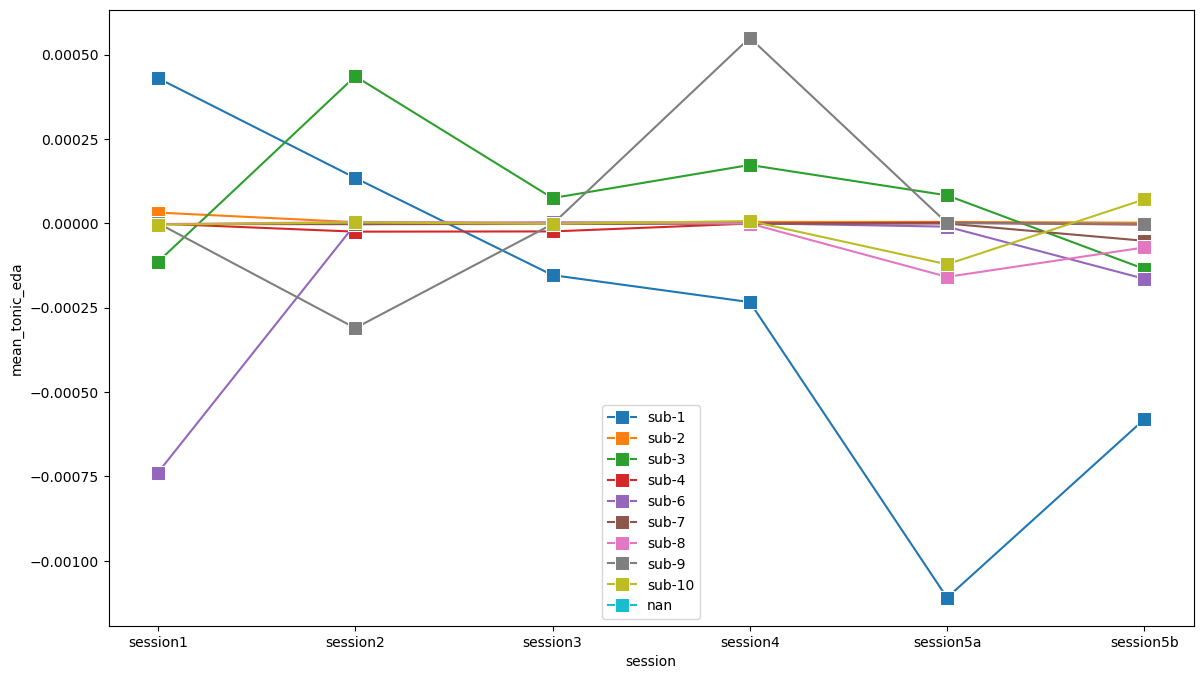

<Figure size 1200x600 with 0 Axes>

In [13]:
# Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


plt.figure(figsize=(14, 8))

labels = ['Session 1 \n Apartment A', 
          'Session 2\n Apartment B', 
          'Session 3\n Apartment C', 
          'Session 4\n Apartment C', 
          'Session 5\n Apartment A \n (Distant Condition)',
          'Session 5\n Apartment B \n (Near Condition)']

for subject in df_all_sessions['subject'].unique():
    df_subject = df_all_sessions[df_all_sessions['subject'] == subject]
    sns.lineplot(data=df_subject, x='session', y='mean_tonic_eda', marker='s', markersize=10, label=subject)
    import matplotlib.pyplot as plt

# ... rest of your code (assuming pivoted_sums is defined)

# Create the line plot
plt.figure(figsize=(12, 6))
pivoted_sums.T.plot(kind='line')

# Customize the plot
plt.title('Sum of SCR Amplitude by Subject and Session')
plt.xlabel('Session')
plt.ylabel('Sum of SCR Amplitude')
plt.legend(title='Subject')
plt.grid(True)
plt.show()

plt.title(None)
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/all-participant-session-means.png", dpi=300)

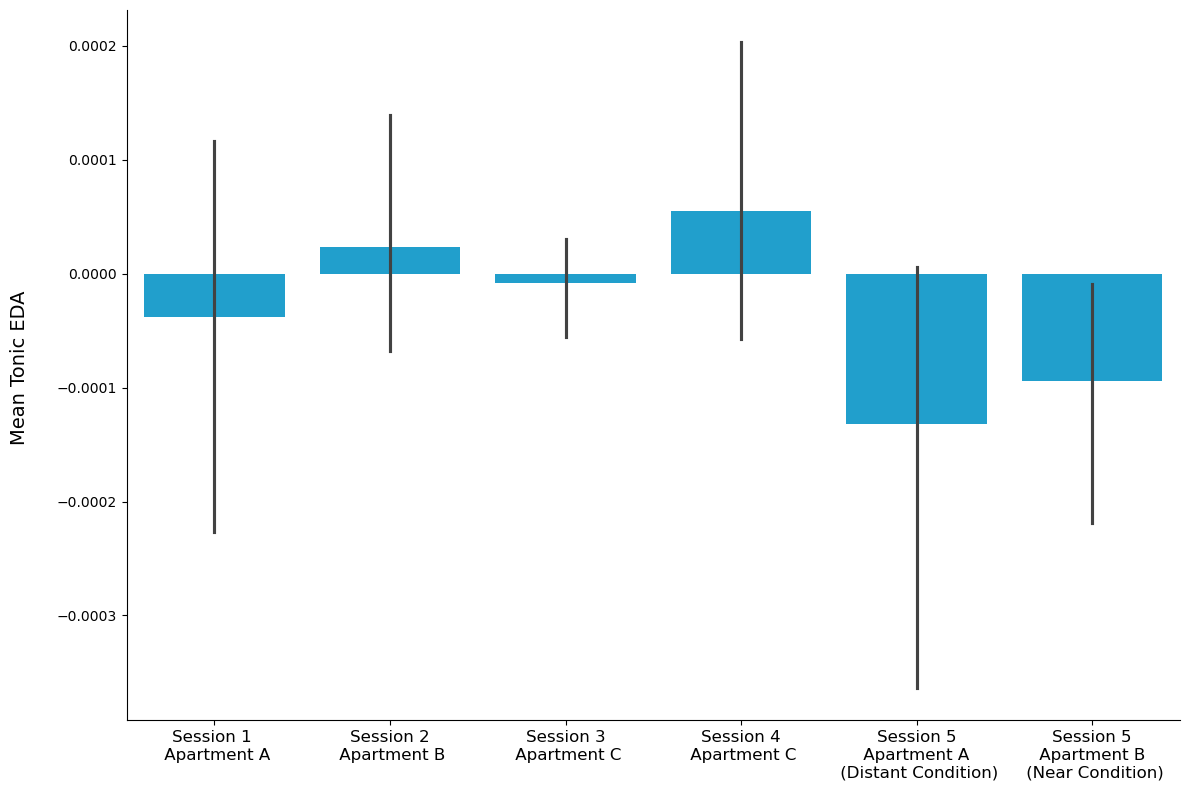

In [14]:
# Plot each mean tonic EDA across subjects for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.tight_layout()
sns.despine()


if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

In [10]:
print (df_all_sessions)

   subject  mean_tonic_eda    session
0    sub-6        5.708873   session1
1    sub-1        5.206632   session1
2    sub-8        0.020974   session1
3    sub-9        0.080793   session1
4    sub-7        0.301530   session1
5   sub-10        0.059970   session1
6   sub-11        0.179346   session1
7    sub-2        1.187510   session1
8    sub-4        0.043028   session1
9    sub-3        2.743530   session1
10   sub-6        0.072972   session2
11   sub-1        1.416779   session2
12   sub-8        0.017090   session2
13   sub-9        1.062661   session2
14   sub-7        0.130172   session2
15  sub-10        0.057432   session2
16  sub-11        0.114019   session2
17   sub-2        0.054161   session2
18   sub-4        0.391494   session2
19   sub-3        1.852254   session2
20   sub-6        0.052307   session3
21   sub-1        2.811964   session3
22   sub-9        0.061177   session3
23  sub-10        0.030863   session3
24  sub-11        0.105205   session3
25   sub-2  

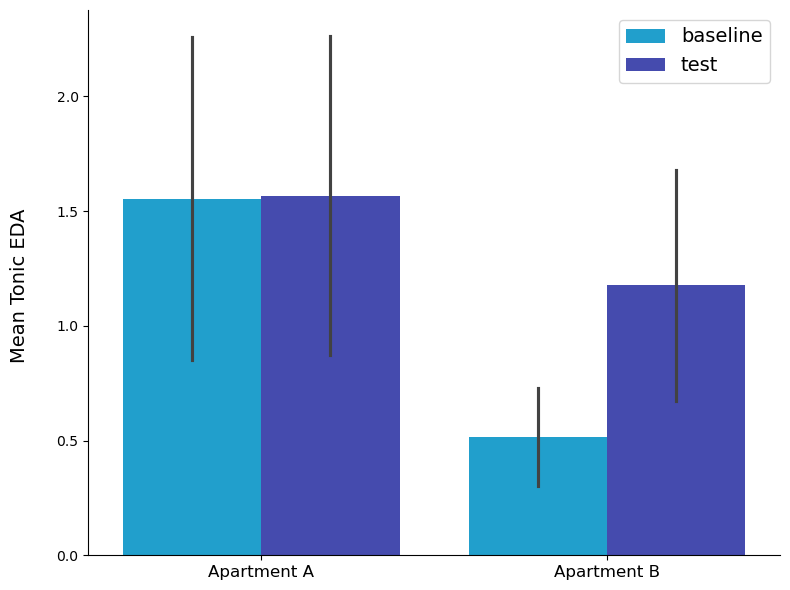

In [11]:
# Plot baseline & test mean tonic EDA across subjects for Apartment A and Apartment B 
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

filtered_df = df_all_sessions[df_all_sessions['session'].isin(
    ['session1', 'session2', 'session5a', 'session5b'])].reset_index(drop=True)

filtered_df['group'] = filtered_df['session'].map({
    'session1': 'baseline',
    'session2': 'baseline',
    'session5a': 'test',
    'session5b': 'test'})

filtered_df['apartment'] = filtered_df['session'].map({
    'session1': 'Apartment A',
    'session2': 'Apartment B',
    'session5a': 'Apartment A',
    'session5b': 'Apartment B'})

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='apartment', y='mean_tonic_eda', hue='group', errorbar='se', palette=['#05ace8', '#343bbf'])
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.legend(title=None, fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/baseline-vs-test.png", dpi=300)

In [ ]:
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_sums = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Onsets'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

In [ ]:
import pandas as pd
import os

# Replace 'subject-csv' with the actual folder path
folder_path = 'subject-csv'

# List of subjects
subjects = ['sub-1', 'sub-2', 'sub-3', ...]  # Replace with your actual list

# Number of iterations (adjust as needed)
num_iterations = 1916

# Create a list to store the mean values for each iteration
mean_eda_tonic_values = []

# Iterate through iterations
for iteration in range(num_iterations):
    # Initialize a list to store EDA_Tonic values for the current iteration
    iteration_eda_tonic_values = []

    # Iterate through subjects
    for subject in subjects:
        # Construct the file path for session-1
        file_path = os.path.join(folder_path, subject, 'session-1.csv')

        if os.path.exists(file_path):
            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Extract the value from the 'EDA_Tonic' column at the specified index
                eda_tonic_value = df['EDA_Tonic'][iteration]

                # Append the value to the list for the current iteration
                iteration_eda_tonic_values.append(eda_tonic_value)

            except FileNotFoundError as e:
                print(f"Error reading file {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")

    # Calculate the mean for the current iteration
    iteration_mean = sum(iteration_eda_tonic_values) / len(iteration_eda_tonic_values)

    # Append the mean to the list of mean values
    mean_eda_tonic_values.append(iteration_mean)

# Print the calculated mean values for each iteration
print("Mean EDA_Tonic values for each iteration:")
print(mean_eda_tonic_values)